In [29]:
import xgbStack
import pandas as pd

from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, RepeatedKFold
from sklearn.metrics import accuracy_score

from itertools import combinations, permutations, product
from collections import Counter
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

match_data_path = "D:\\Github Repos\\csci-567\\lol_data\\matchinfo.csv"

INPUT_COLS_MATCHDATA = [
    "League",
    "Year",
    "Season",
    "Type",
    "blueTeamTag",
    "redTeamTag",
    "bResult",
    # "rResult", #For experimental purposes only. Remove after final implementation
    "blueTop",
    "blueTopChamp",
    "blueJungle",
    "blueJungleChamp",
    "blueMiddle",
    "blueMiddleChamp",
    "blueADC",
    "blueADCChamp",
    "blueSupport",
    "blueSupportChamp",
    "redTop",
    "redTopChamp",
    "redJungle",
    "redJungleChamp",
    "redMiddle",
    "redMiddleChamp",
    "redADC",
    "redADCChamp",
    "redSupport",
    "redSupportChamp"
]

match_data = pd.read_csv(match_data_path, usecols=INPUT_COLS_MATCHDATA)
match_data = match_data.dropna(subset=['blueTeamTag', 'blueTop'], ignore_index=True) 

match_data.head()

,League,Year,Season,Type,blueTeamTag,bResult,redTeamTag,blueTop,blueTopChamp,blueJungle,...,redTop,redTopChamp,redJungle,redJungleChamp,redMiddle,redMiddleChamp,redADC,redADCChamp,redSupport,redSupportChamp
0,NALCS,2015,Spring,Season,TSM,1,C9,Dyrus,Irelia,Santorin,...,Balls,Gnar,Meteos,Elise,Hai,Fizz,Sneaky,Sivir,LemonNation,Thresh
1,NALCS,2015,Spring,Season,CST,0,DIG,Cris,Gnar,Impaler,...,Gamsu,Irelia,Crumbzz,JarvanIV,Shiphtur,Azir,CoreJJ,Corki,KiWiKiD,Annie
2,NALCS,2015,Spring,Season,WFX,1,GV,Flaresz,Renekton,ShorterACE,...,Hauntzer,Sion,Saintvicious,LeeSin,Keane,Azir,Cop,Corki,BunnyFuFuu,Janna
3,NALCS,2015,Spring,Season,TIP,0,TL,Rhux,Irelia,Rush,...,Quas,Gnar,IWDominate,Nunu,Fenix,Lulu,KEITH,KogMaw,Xpecial,Janna
4,NALCS,2015,Spring,Season,CLG,1,T8,Benny,Gnar,Xmithie,...,CaliTrlolz8,Sion,Porpoise8,RekSai,Slooshi8,Lulu,Maplestreet8,Corki,Dodo8,Annie


In [37]:
match_data_copy = match_data.copy()

sRole = 'blueSupport'

# Initialize the encoder
ohe = OneHotEncoder(sparse_output=False)  # Setting sparse=False returns a NumPy array instead of a sparse matrix

# Fit and transform the data
encoded_array = ohe.fit_transform(match_data[[sRole]])

# # Retrieve the feature names
feature_names = ohe.get_feature_names_out([sRole])

# Convert the encoded array back into a DataFrame
encoded_df = pd.DataFrame(encoded_array, columns=feature_names)
modified_match_data = pd.concat([match_data_copy, encoded_df], axis=1)
modified_match_data.drop(columns=[sRole], inplace=True)

print(modified_match_data.head())

  League  Year  Season    Type blueTeamTag  bResult redTeamTag  blueTop  \
0  NALCS  2015  Spring  Season         TSM        1         C9    Dyrus   
1  NALCS  2015  Spring  Season         CST        0        DIG     Cris   
2  NALCS  2015  Spring  Season         WFX        1         GV  Flaresz   
3  NALCS  2015  Spring  Season         TIP        0         TL     Rhux   
4  NALCS  2015  Spring  Season         CLG        1         T8    Benny   

  blueTopChamp  blueJungle  ... blueSupport_rogu blueSupport_sOnyky  \
0       Irelia    Santorin  ...              0.0                0.0   
1         Gnar     Impaler  ...              0.0                0.0   
2     Renekton  ShorterACE  ...              0.0                0.0   
3       Irelia        Rush  ...              0.0                0.0   
4         Gnar     Xmithie  ...              0.0                0.0   

  blueSupport_skash blueSupport_sonyky blueSupport_sprattel blueSupport_tei  \
0               0.0                0.0     

In [46]:
#Note, this code block has a dependency on the previous code block; it must be executed before this can be run.
match_data_copy = match_data.copy()

ltRoles = [
    "blueTop",    
    "blueJungle",    
    "blueMiddle",    
    "blueADC",
    "blueSupport"
]

# Initialize the encoder
ohe = OneHotEncoder(sparse_output=False)  # Setting sparse=False returns a NumPy array instead of a sparse matrix

# Fit and transform the data
# encoded_array_bTop = ohe.fit_transform(match_data[['blueTop']])
# encoded_array_bJungle = ohe.fit_transform(match_data[['blueJungle']])
encoded_array_both = ohe.fit_transform(match_data[ltRoles])

# # Retrieve the feature names
feature_names_both = ohe.get_feature_names_out(ltRoles)

# Convert the encoded array back into a DataFrame
encoded_df_both = pd.DataFrame(encoded_array_both, columns=feature_names_both)

print(encoded_df_both.head(2))




   blueTop_3z  blueTop_957  blueTop_ADD  blueTop_AJ  blueTop_AJun  \
0         0.0          0.0          0.0         0.0           0.0   
1         0.0          0.0          0.0         0.0           0.0   

   blueTop_Acce  blueTop_Achie  blueTop_Acorn  blueTop_Air  blueTop_Akasi  \
0           0.0            0.0            0.0          0.0            0.0   
1           0.0            0.0            0.0          0.0            0.0   

   ...  blueSupport_rogu  blueSupport_sOnyky  blueSupport_skash  \
0  ...               0.0                 0.0                0.0   
1  ...               0.0                 0.0                0.0   

   blueSupport_sonyky  blueSupport_sprattel  blueSupport_tei  \
0                 0.0                   0.0              0.0   
1                 0.0                   0.0              0.0   

   blueSupport_tgun  blueSupport_un1tback  blueSupport_viviD  \
0               0.0                   0.0                0.0   
1               0.0                  

In [47]:
#Note, this code block has a dependency on the previous code block; it must be executed before this can be run.
test_df = encoded_df_both.copy()
y_full_df = modified_match_data['bResult']

x_train, x_test, y_train, y_test = train_test_split(test_df, y_full_df, test_size=0.1, stratify=y_full_df, random_state=42)

model_nn = MLPClassifier(hidden_layer_sizes=(256,),  
                activation='tanh',          # Activation function for hidden layers
                learning_rate_init=3e-4,
                max_iter=500,
                batch_size=2275,
                alpha=0.0001,
                learning_rate='adaptive',
                beta_1=0.9,
                solver='adam')   

pipeline = Pipeline([
    ('scaler', StandardScaler()),         # Z-Score normalization occurs here
    ('neural_network', model_nn)            # Step 2: Stacking Classifier with meta-model
])

repeated_kfold = RepeatedKFold(n_splits=3, n_repeats=1, random_state=42)
scores = cross_val_score(pipeline, x_train, y_train, cv=repeated_kfold)

# print("Cross-validation scores:", scores)
# print("Mean cross-validation score:", scores.mean())
# print("Standard deviation of cross-validation scores:", scores.std())

pipeline.fit(x_train, y_train)
y_pred = pipeline.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.5889


=== Raw Data Sample ===
   customer_id  age  target  purchase_m1  purchase_m2  purchase_m3  \
0            1   56       0    32.911092    74.395698    22.225795   
1            2   69       0    43.787323    24.173888    38.514953   
2            3   46       0    36.885817    18.327179    20.884474   
3            4   32       1    30.837636    18.469864    27.484556   
4            5   60       0    18.741446   104.807497    36.751586   

   purchase_m4  purchase_m5  purchase_m6  purchase_m7  purchase_m8  \
0    68.215128    50.797682    24.890444    59.322952    48.221503   
1    34.546753    52.931640   126.194648    40.195906    92.904284   
2    44.052290    92.295605    31.664326     8.182023    13.306886   
3    43.274688    10.336263    86.234306    42.988633    46.572149   
4    18.659613    23.089158     4.477141    22.965614     1.745985   

   purchase_m9  purchase_m10  purchase_m11  purchase_m12  
0    83.271293     53.045084     29.201875     37.266776  
1    51.621635  

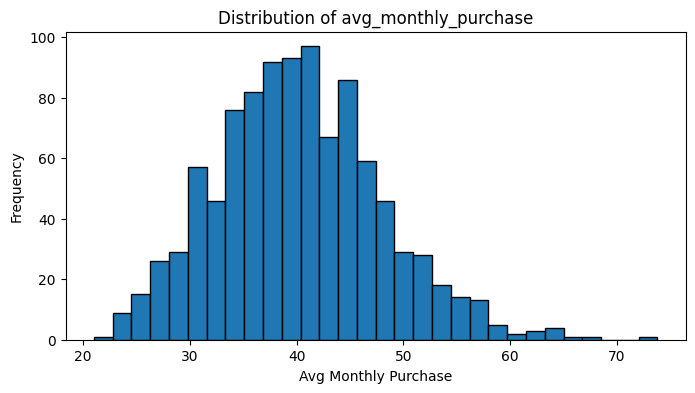


Correlation between age and avg_monthly_purchase: -0.01

Manual check for one customer passed.

Quick Model Check:
Train Accuracy: 1.000
Test Accuracy:  0.410

Feature validation steps completed successfully.


In [22]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# ---------------------------
# STEP 1: Simulate Raw Data
# ---------------------------
np.random.seed(42)

# Suppose we have 1,000 customers
num_customers = 1000

# Basic customer info
customer_ids = np.arange(1, num_customers + 1)
ages = np.random.randint(18, 70, size=num_customers)

# Simulated target: whether the customer purchased a premium subscription (binary classification)
targets = np.random.randint(0, 2, size=num_customers)

# Simulate monthly purchase amounts: a 2D array with shape [num_customers, num_months]
num_months = 12
monthly_purchases = np.random.gamma(shape=2.0, scale=20.0, size=(num_customers, num_months))

# Create a DataFrame
raw_df = pd.DataFrame({
    'customer_id': customer_ids,
    'age': ages,
    'target': targets
})

# The monthly purchases would normally be in a structured format.
# For simplicity, add them as separate columns: purchase_m1, purchase_m2, ...
for i in range(num_months):
    raw_df[f'purchase_m{i+1}'] = monthly_purchases[:, i]

print("=== Raw Data Sample ===")
print(raw_df.head())


# ---------------------------
# STEP 2: Implementing the New Feature
# ---------------------------
# We want to create a new feature: avg_monthly_purchase = mean of all monthly purchases
monthly_cols = [f'purchase_m{i+1}' for i in range(num_months)]
raw_df['avg_monthly_purchase'] = raw_df[monthly_cols].mean(axis=1)

print("\n=== Data with New Feature ===")
print(raw_df[['customer_id', 'age', 'avg_monthly_purchase', 'target']].head())


# ---------------------------
# STEP 3: Validate the Implementation
# ---------------------------

# (A) Schema Check: Ensure new feature is numeric and has no forbidden values
assert pd.api.types.is_numeric_dtype(raw_df['avg_monthly_purchase']), "avg_monthly_purchase is not numeric"
assert (raw_df['avg_monthly_purchase'] >= 0).all(), "avg_monthly_purchase should not have negative values"

# (B) Statistical Checks
print("\n=== Statistical Summary of avg_monthly_purchase ===")
print(raw_df['avg_monthly_purchase'].describe())

# Check for a reasonable range
# Given we drew from a Gamma(2,20), the average should be roughly in a certain range.
# Gamma(2,20) has mean = shape*scale = 40 per month, so for 12 months, the average might be around ~40.
# Just a rough check:
mean_val = raw_df['avg_monthly_purchase'].mean()
if not (0 < mean_val < 100):
    print("Warning: The average monthly purchase mean is outside expected range.")

# (C) Missing Values Check
missing_count = raw_df['avg_monthly_purchase'].isna().sum()
assert missing_count == 0, f"There are {missing_count} missing values in avg_monthly_purchase."

# (D) Distribution Visualization
plt.figure(figsize=(8,4))
plt.hist(raw_df['avg_monthly_purchase'], bins=30, edgecolor='black')
plt.title('Distribution of avg_monthly_purchase')
plt.xlabel('Avg Monthly Purchase')
plt.ylabel('Frequency')
plt.show()

# (E) Correlation Check with Age
correlation = raw_df[['age', 'avg_monthly_purchase']].corr().iloc[0,1]
print(f"\nCorrelation between age and avg_monthly_purchase: {correlation:.2f}")
# Just to see if it's not totally nonsensical. 
# We wouldn't expect strong correlation here since we simulated random data.


# (F) Manual Spot Checks
# Pick a random customer and manually verify calculation
sample_row = raw_df.sample(1, random_state=42)
cust_id = sample_row['customer_id'].values[0]
row_data = raw_df.loc[raw_df['customer_id'] == cust_id, monthly_cols].values[0]
computed_avg = np.mean(row_data)
assert np.isclose(sample_row['avg_monthly_purchase'].values[0], computed_avg, atol=1e-10), "Computed avg doesn't match manual calculation."
print("\nManual check for one customer passed.")


# ---------------------------
# STEP 4: Quick Model Test
# ---------------------------
# Even though this doesn't guarantee correctness, a quick baseline model check can show if the feature behaves oddly.

# Prepare features: Use age and avg_monthly_purchase to predict the target
X = raw_df[['age', 'avg_monthly_purchase']]
y = raw_df['target']

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Optional: Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Quick Random Forest
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)
train_score = model.score(X_train_scaled, y_train)
test_score = model.score(X_test_scaled, y_test)

print(f"\nQuick Model Check:")
print(f"Train Accuracy: {train_score:.3f}")
print(f"Test Accuracy:  {test_score:.3f}")

# If the feature was nonsensical, we might see odd behavior like very low performance or strange distributions in predictions.
# In a real-world scenario, you'd compare this with a model trained without the new feature as a control.


# ---------------------------
# STEP 5: Logging & Alerting (Conceptual)
# ---------------------------
# In production, you would add logging statements in your feature creation pipeline:
# Example (conceptual, not executed here):
# import logging
# logger = logging.getLogger(__name__)
# logger.info("avg_monthly_purchase feature created successfully, mean: %f", mean_val)

# You could also implement data drift monitoring to alert if future data strays from the expected distribution.


# At this point, we've:
# - Checked the feature is numeric and plausible.
# - Verified no missing or negative values.
# - Performed basic statistical checks and a correlation check.
# - Created a quick model to see if including the feature doesn't cause immediate red flags.
# - Added conceptual instructions for logging and monitoring.

print("\nFeature validation steps completed successfully.")


             Feature  Importance
3   petal width (cm)    0.433982
2  petal length (cm)    0.417308
0  sepal length (cm)    0.104105
1   sepal width (cm)    0.044605


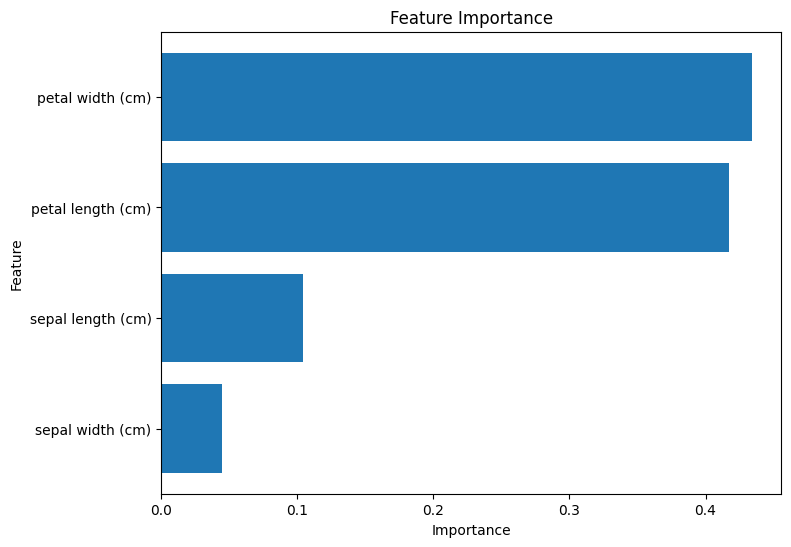

In [25]:
# Load a sample dataset (Iris dataset)
data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Get feature importance
feature_importance = model.feature_importances_

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

# Display the feature importance
print(importance_df)

# Plot the feature importance
plt.figure(figsize=(8, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()  # Invert y-axis for better visualization
plt.show()